## 回归预测x与y的关系-线性模型

神经网络(一种通过简单函数的组合来实现复杂函数的数学实体)是深度学习的核心。   
`PyTorch`中有一个专门用于神经网络的模块`torch.nn`，（Neural Network）`nn`模块包含创建各种神经网络结构所需的构建块。

In [1]:
%matplotlib inline
import torch
import torch.nn as nn
import torch.optim as optim

import numpy as np
import matplotlib.pyplot as plt

torch.set_printoptions(edgeitems=2)
torch.manual_seed(123456)

print("")

### 1. 准备数据x和y

#### 1.1 准备数据

In [2]:
# x and y
x = [-6.0, -4.0, -1.2, -1.6, 1.0, 1.5, 2.3, 1.9, 3.3, 4.2, 5.0, 7.7, 8.2]
x = torch.tensor(x)

y = torch.tensor([
    -36.8778, -26.4276, -19.5442, -20.2848, -10.5902, -13.0207, -10.1414, -9.3716,
    -4.7571,  -1.8561, 1.2260,  12.6646,  12.8662
])

#### 1.2 画出点

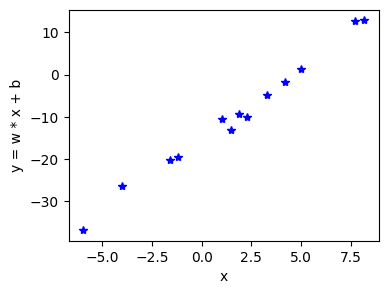

In [3]:
# 画出x、y的点
fig = plt.figure(figsize=(4,3), dpi=100)
plt.xlabel("x")
plt.ylabel("y = w * x + b")
plt.plot(x.numpy(), y.numpy(), '*', color="blue")
plt.show()

### 2. 体验nn.Linear(线性模型)

In [4]:
# 我们这里的x与y，是输入张量的大小为1，输出张量的大小也是1
linear_model = nn.Linear(1, 1)

In [5]:
linear_model

Linear(in_features=1, out_features=1, bias=True)

In [6]:
# 查看weight和bias
linear_model.weight, linear_model.bias

(Parameter containing:
 tensor([[0.0086]], requires_grad=True),
 Parameter containing:
 tensor([0.6356], requires_grad=True))

In [7]:
linear_x = torch.ones(1)
linear_x, linear_x.shape

(tensor([1.]), torch.Size([1]))

In [8]:
# 注意我们这里传入的值的列，是要和实例化Linear的in_features是相同的，要不然会报错
linear_model(linear_x)

tensor([0.6441], grad_fn=<ViewBackward0>)

In [9]:
# 我们来个N行的数据
linear_x2 = torch.ones(5, 1)
linear_x2.shape

torch.Size([5, 1])

In [10]:
# 查看模型的参数的个数
sum(p.numel() for p in linear_model.parameters() if p.requires_grad)

2

In [11]:
linear_model(linear_x2)

tensor([[0.6441],
        [0.6441],
        [0.6441],
        [0.6441],
        [0.6441]], grad_fn=<AddmmBackward0>)

**接下来我们就要结合优化器、损失函数，来计算出所需的`w`和`b`**.

### 3. 使用nn.Linear模型训练出w和b

### 3.1 unsqueeze调整张量

`torch.unsqueeze()`函数可以给输入张量指定位置增加一个维度大小为1的维度。

In [12]:
x

tensor([-6.0000, -4.0000, -1.2000, -1.6000,  1.0000,  1.5000,  2.3000,  1.9000,
         3.3000,  4.2000,  5.0000,  7.7000,  8.2000])

In [13]:
x.unsqueeze(0)

tensor([[-6.0000, -4.0000, -1.2000, -1.6000,  1.0000,  1.5000,  2.3000,  1.9000,
          3.3000,  4.2000,  5.0000,  7.7000,  8.2000]])

In [14]:
x.unsqueeze(1)

tensor([[-6.0000],
        [-4.0000],
        [-1.2000],
        [-1.6000],
        [ 1.0000],
        [ 1.5000],
        [ 2.3000],
        [ 1.9000],
        [ 3.3000],
        [ 4.2000],
        [ 5.0000],
        [ 7.7000],
        [ 8.2000]])

In [15]:
x

tensor([-6.0000, -4.0000, -1.2000, -1.6000,  1.0000,  1.5000,  2.3000,  1.9000,
         3.3000,  4.2000,  5.0000,  7.7000,  8.2000])

In [16]:
# 在这里其实我们用view()函数也是OK的
x.view(-1, 1)

tensor([[-6.0000],
        [-4.0000],
        [-1.2000],
        [-1.6000],
        [ 1.0000],
        [ 1.5000],
        [ 2.3000],
        [ 1.9000],
        [ 3.3000],
        [ 4.2000],
        [ 5.0000],
        [ 7.7000],
        [ 8.2000]])

In [17]:
# 现在我们改变一下x和y
t_x = x.unsqueeze(1)
t_y = y.unsqueeze(1)

In [18]:
t_x.shape, t_y.shape

(torch.Size([13, 1]), torch.Size([13, 1]))

### 3.2 模型、优化器和损失函数

In [19]:
# 模型
model = nn.Linear(1, 1) # 输入和输出张量的大小都是1

# 优化器
learning_rate = 1e-2
optimizer = optim.SGD(
    model.parameters(),
    lr=learning_rate
)

# 损失函数
def loss_function(predict, real_value):
    squared_diffs = (predict - real_value)**2
    return squared_diffs.mean()

### 3.3 训练循环

In [20]:
def training_loop(epochs, model, optimizer, loss_function, train_source, train_real_value, print_step=10):
    for epoch in range(epochs):
        # 先对参数的梯段置零
        optimizer.zero_grad()

        # 正向传播：计算预测值
        predict = model(train_source)
        
        # 计算损失
        loss = loss_function(predict, train_real_value)
        
        # print(epoch, "loss is", loss)
        # 反向传播: 更新params的梯度
        loss.backward()
        
        # 不需要手动去修改params了，直接调用优化器的step()
        optimizer.step()
            
        # 输出日志信息
        if  epoch == 0 or (epoch + 1) % print_step == 0:
            print("第{}次训练, Loss is {:.2f}, params: weight->{:.3f},bias->{:.3f}".format(epoch + 1, float(loss), model.weight.item(), model.bias.item()))

### 3.4 使用训练循环

In [21]:
training_loop(
    epochs=500,
    model=model,
    optimizer=optimizer,
    loss_function=loss_function,
    train_source=t_x,
    train_real_value=t_y,
    print_step=100
)

第1次训练, Loss is 302.92, params: weight->0.711,bias->0.631
第100次训练, Loss is 10.34, params: weight->3.112,bias->-12.484
第200次训练, Loss is 2.48, params: weight->3.346,bias->-14.970
第300次训练, Loss is 2.22, params: weight->3.389,bias->-15.428
第400次训练, Loss is 2.21, params: weight->3.397,bias->-15.513
第500次训练, Loss is 2.21, params: weight->3.399,bias->-15.528


In [22]:
model.weight, model.bias

(Parameter containing:
 tensor([[3.3986]], requires_grad=True),
 Parameter containing:
 tensor([-15.5281], requires_grad=True))

#### 3.5 xy图形展示

In [23]:
# x中的点
x_line = np.linspace(-10,10,500)

weight = model.weight.item()
bias = model.bias.item()

# 计算y的点
y_line = weight * x_line + bias

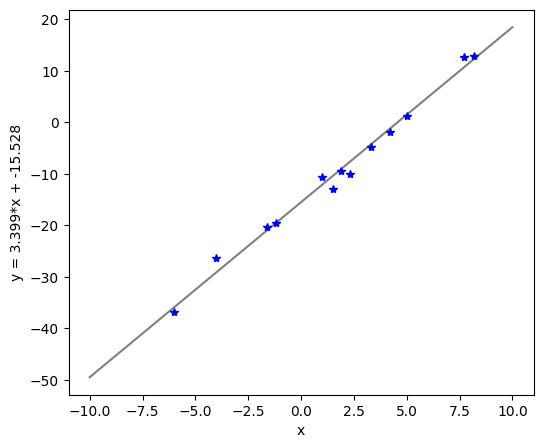

In [24]:
# 画图
fig = plt.figure(figsize=(6,5), dpi=100)
plt.xlabel("x")
plt.ylabel("y = {:.3f}*x + {:.3f}".format(weight, bias))
plt.plot(x_line, y_line, label=f"y = {weight}*x + {bias}", color="gray")
plt.plot(x.numpy(), y.numpy(), '*', color="blue")
plt.show()